In [1]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The hypothesis
def h(x, theta_0 = 0, theta_1 = 0):
    """
    calculates the predicted values (or predicted targets) for a given set of inputs and thetas.
    :param x: inputs (feature values) - Numpy array of floats
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :return: predicted targets - Numpy array of floats

    """
    return theta_0 + (theta_1 * x)

In [3]:
# Cost function
def J(theta_0, theta_1, X, y):
    """
     calculates the total error for a given set of inputs and thetas.
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :param X: inputs (feature values) - Numpy array of floats
    :param y: inputs (actual target values) - Numpy array of floats
    :return: total error - floats

    """
    diff = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    diff_squared = np.square(diff)
    return (diff_squared.sum()/(len(X)*2))

In [4]:
# Gradient descent function
def gradient(theta_0, theta_1, alpha, X, y):
    """
     calculates the gradient descent for a given set of inputs and thetas.
    :param theta_0: intercept - float
    :param theta_1: slope - float
    :param alpha: learning rate - float
    :param X: inputs (feature values) - Numpy array of floats
    :param y: inputs (actual target values) - Numpy array of floats
    :return: calculated theta_0 and theta_1 - tuple of floats

    """
    my_array_0 = (np.subtract(h(X, theta_0, theta_1),np.asarray(y)))
    my_array_1 = np.matmul(np.transpose(my_array_0), X)

    theta_0_temp = (alpha / len(X)) * my_array_0.sum()
    theta_1_temp = (alpha / len(X)) * my_array_1.sum()

    new_theta_0 = theta_0-theta_0_temp
    new_theta_1 = theta_1-theta_1_temp

    return (new_theta_0, new_theta_1)

In [6]:
# Get the data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test (1).csv')

# Set X and y for training
X_train = pd.DataFrame(data = train_data['x'])
y = pd.DataFrame(data = train_data['y'])

# Set X_test and y_test for evaluation
X_test_data = pd.DataFrame(data = test_data['x'])
y_test = pd.DataFrame(data = test_data['y'])

# Row 213 of the training data has no y value; as a result, we will drop it.
X_train.drop([213], inplace=True)
y.drop([213], inplace=True)

print(X_train.head())

# Convert the dataframes to a numpy arrays
X = X_train.to_numpy()
X_test = X_test_data.to_numpy()

      x
0  24.0
1  50.0
2  15.0
3  38.0
4  87.0


**Model Training**

initial Cost: 1670.0624130893364
cost: 743.1010875141254

Iteration: 1
diff: 926.9613255752109
theta 0: 0.004993986917045781
theta 1: 0.33354245845185376
cost: 331.86123601466835

Iteration: 2
diff: 411.2398514994571
theta 0: 0.008319284972241516
theta 1: 0.5557035214498387
cost: 149.41757755535286

Iteration: 3
diff: 182.4436584593155
theta 0: 0.010533127355656115
theta 1: 0.7036773052035966
cost: 68.47773575109734

Iteration: 4
diff: 80.93984180425552
theta 0: 0.012006667742524593
theta 1: 0.8022375187713469
cost: 32.569345994371076

Iteration: 5
diff: 35.908389756726265
theta 0: 0.012987118705779484
theta 1: 0.8678850693676075
cost: 16.63884219635945

Iteration: 6
diff: 15.930503798011625
theta 0: 0.01363913995457535
theta 1: 0.9116106382126296
cost: 9.571386539860526

Iteration: 7
diff: 7.067455656498925
theta 0: 0.01407240560255936
theta 1: 0.9407347363616418
cost: 6.435959653629739

Iteration: 8
diff: 3.1354268862307872
theta 0: 0.014359965767857044
theta 1: 0.9601333019877012
co

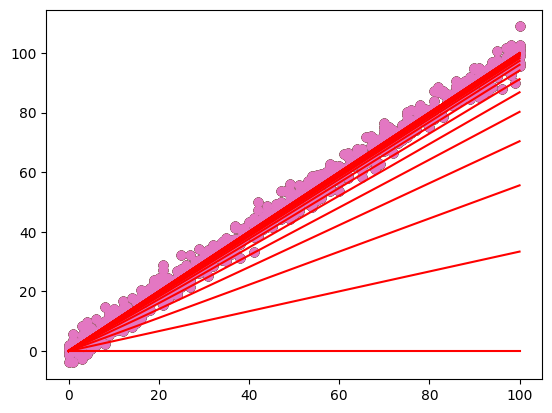

In [9]:
# Initialize theta_0, theta_1 and the learning rate
alpha = 0.0001
theta_0 = 0
theta_1 = 0

# Convergence threshold
my_diff = 0.000001

# Initial cost value
diff = J(theta_0, theta_1, X, y)
print("initial Cost: {}".format(J(theta_0, theta_1, X, y)))

# We will count the number of iterations
my_iter = 0

while diff >= my_diff:
    # Draw the current hypothesis and the training
    # set to the x-y plane.
    # We will draw all the hypothesis lines so that
    # the reader can see how the hypothesis changes
    # with each iteration.
    my_line = np.linspace(0,100)
    z = theta_0 + theta_1 * (my_line)
    plt.scatter(X,y)
    plt.plot(my_line,z, 'r')

    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)

    # calculate and assign the new theta_0 and theta_1 values
    theta_0, theta_1 = gradient(theta_0, theta_1, alpha, X, y)

    # calculate the consecutive cost value
    new_cost = J(theta_0, theta_1, X, y)
    print("cost: {}".format(new_cost))

    # calculate the difference between the consecutive
    # cost values
    diff = initial_cost - new_cost

    my_iter += 1

    print()
    print("Iteration: {}".format(my_iter))
    print("diff: {}".format(diff))
    print("theta 0: {}".format(theta_0))
    print("theta 1: {}".format(theta_1))

plt.show()

initial Cost: 207505.03742208227

Iteration: 10000
Cost: 11.116903205237131
Diff: 0.0003601674161615165

Iteration: 20000
Cost: 8.284498617558627
Diff: 0.00021814652931340106

Iteration: 30000
Cost: 6.568965222022944
Diff: 0.00013212718895427855

Iteration: 40000
Cost: 5.529899389408219
Diff: 8.002691638608894e-05

Iteration: 50000
Cost: 4.900557047651989
Diff: 4.847077574865466e-05

Iteration: 60000
Cost: 4.51937640375524
Diff: 2.935782369295481e-05

Iteration: 70000
Cost: 4.288502563491975
Diff: 1.7781473444777873e-05

Iteration: 80000
Cost: 4.14866668522438
Diff: 1.0769899064122512e-05

Iteration: 90000
Cost: 4.063970762860149
Diff: 6.5231222912132125e-06

Iteration: 100000
Cost: 4.012672059308543
Diff: 3.950930662632857e-06

Iteration: 110000
Cost: 3.981601413725882
Diff: 2.3930032897467868e-06

Iteration: 120000
Cost: 3.9627825167541064
Diff: 1.449396417108062e-06

Final Cost: 3.9538191331407084
Diff: 9.999593206799773e-07
Theta 0: -0.5060916482754081
Theta 1: 1.006631498606685
It

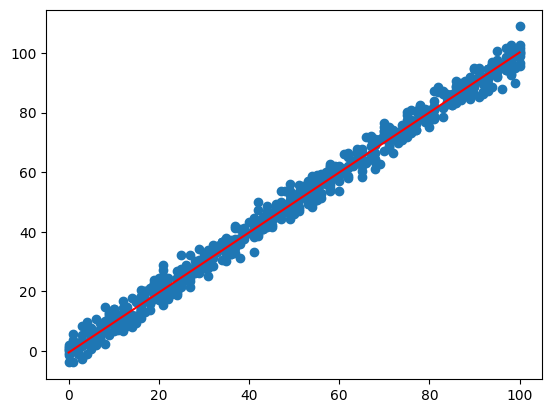

In [10]:
# Initialize theta_0, theta_1 and the learning rate
alpha = 0.0001
theta_0 = -10
theta_1 = -10

# Convergence threshold
my_diff = 0.000001

# Initial cost value
diff = J(theta_0, theta_1, X, y)

# We will count the number of iterations
my_iter = 0
print("initial Cost: {}".format(J(theta_0, theta_1, X, y)))

while diff >= my_diff:
    # calculate initial cost value
    initial_cost = J(theta_0, theta_1, X, y)

    # calculate and assign the new theta_0 and theta_1 values
    theta_0, theta_1 = gradient(theta_0, theta_1, alpha, X, y)

    # calculate the consecutive cost value
    new_cost = J(theta_0, theta_1, X, y)

    # calculate the difference between the consecutive
    # cost values
    diff = initial_cost - new_cost

    # print for every 10000 iteration
    my_iter += 1
    if my_iter%10000 ==0:
        print()
        print("Iteration: {}".format(my_iter))
        print("Cost: {}".format(new_cost))
        print("Diff: {}".format(diff))

print()
print("Final Cost: {}".format(new_cost))
print("Diff: {}".format(diff))
print("Theta 0: {}".format(theta_0))
print("Theta 1: {}".format(theta_1))
print("Iteration: {}".format(my_iter))
print()

# Draw the final hypothesis and the training
# set to the x-y plane.
# We will not draw all the hypothesis lines
# because of the high iteration count.
my_line = np.linspace(0,100)
z = theta_0 + theta_1 * (my_line)
plt.scatter(X,y)
plt.plot(my_line,z, 'r')
plt.show()

**Model Evaluation**

Cost of test data: 4.7015230120840545


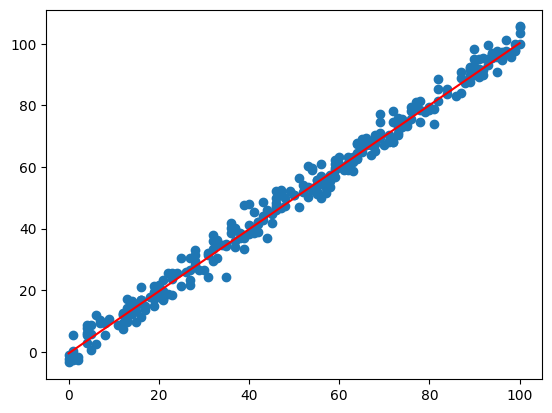

In [11]:
# calculate the cost value for the test set
cost_test = J(theta_0, theta_1, X_test, y_test)
print("Cost of test data: {}".format(cost_test))

# Draw the final hypothesis and the test
# set to the x-y plane.
my_line = np.linspace(0,100)
z = theta_0 + theta_1 * (my_line)
plt.scatter(X_test,y_test)
plt.plot(my_line,z, 'r')
plt.show()

 I have written the hypothesis, cost function, and gradient descent algorithms in python. Moreover, we have trained two different models by changing model parameters  θ0
  and  θ1
 . We have seen that choosing a point on the best fitting line may substantially decrease the number of iterations.